# N-grams
So far we’ve considered words as individual units, and considered their relationships with sentiment or frequency of occurrence. However, many interesting text analyses are based on the relationships between words.
One such relationship is given by n-grams.

N-grams are groups of n consecutive words that appear in a given text corpus.

Bigrams are groups of 2 consecutive words (e.g. she went, he ate, car crashed)

Trigrams are groups of 3 consecutive words (e.g. she went home, he ate a, the car crashed).


In [1]:
%pip install gutenbergpy tidytext

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import gutenbergpy.textget
from tidytext import unnest_tokens
import nltk
nltk.download('punkt')

raw_book = gutenbergpy.textget.get_text_by_id(161)
sense_sensibility_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# E1 - Warm up
Write pure python code to get all the bigrams from Sense and Sensibility as a list of tuples. 

Don't use any tidytext or nltk functionality.



In [7]:
# Write your code below
sense_sensibility_words = sense_sensibility_text.split()
sense_sensibility_bigrams = [(word1, word2) for word1, word2 in zip(sense_sensibility_words, sense_sensibility_words[1:])]
sense_sensibility_bigrams

[('[Illustration]', 'Sense'),
 ('Sense', 'and'),
 ('and', 'Sensibility'),
 ('Sensibility', 'by'),
 ('by', 'Jane'),
 ('Jane', 'Austen'),
 ('Austen', '(1811)'),
 ('(1811)', 'Contents'),
 ('Contents', 'CHAPTER'),
 ('CHAPTER', 'I'),
 ('I', 'CHAPTER'),
 ('CHAPTER', 'II'),
 ('II', 'CHAPTER'),
 ('CHAPTER', 'III'),
 ('III', 'CHAPTER'),
 ('CHAPTER', 'IV'),
 ('IV', 'CHAPTER'),
 ('CHAPTER', 'V'),
 ('V', 'CHAPTER'),
 ('CHAPTER', 'VI'),
 ('VI', 'CHAPTER'),
 ('CHAPTER', 'VII'),
 ('VII', 'CHAPTER'),
 ('CHAPTER', 'VIII'),
 ('VIII', 'CHAPTER'),
 ('CHAPTER', 'IX'),
 ('IX', 'CHAPTER'),
 ('CHAPTER', 'X'),
 ('X', 'CHAPTER'),
 ('CHAPTER', 'XI'),
 ('XI', 'CHAPTER'),
 ('CHAPTER', 'XII'),
 ('XII', 'CHAPTER'),
 ('CHAPTER', 'XIII'),
 ('XIII', 'CHAPTER'),
 ('CHAPTER', 'XIV'),
 ('XIV', 'CHAPTER'),
 ('CHAPTER', 'XV'),
 ('XV', 'CHAPTER'),
 ('CHAPTER', 'XVI'),
 ('XVI', 'CHAPTER'),
 ('CHAPTER', 'XVII'),
 ('XVII', 'CHAPTER'),
 ('CHAPTER', 'XVIII'),
 ('XVIII', 'CHAPTER'),
 ('CHAPTER', 'XIX'),
 ('XIX', 'CHAPTER'),
 ('CHA

Get the rest of our Jane Austen books

In [8]:
raw_book = gutenbergpy.textget.get_text_by_id(1342)
pride_prejudice_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")

raw_book = gutenbergpy.textget.get_text_by_id(158)
emma_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")

raw_book = gutenbergpy.textget.get_text_by_id(105)
persuasion_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")



# Create our dataframe
import re
sense_sensibility_lines = sense_sensibility_text.splitlines()
pride_prejudice_lines = pride_prejudice_text.splitlines()
emma_lines = emma_text.splitlines()
persuasion_lines = persuasion_text.splitlines()

sense_sensibility_df = pd.DataFrame({
    "content": sense_sensibility_lines,
    "line": list(range(len(sense_sensibility_lines)))
})

pride_prejudice_df = pd.DataFrame({
    "content": pride_prejudice_lines,
    "line": list(range(len(pride_prejudice_lines)))
})

emma_df = pd.DataFrame({
    "content": emma_lines,
    "line": list(range(len(emma_lines)))
})

persuasion_df = pd.DataFrame({
    "content": persuasion_lines,
    "line": list(range(len(persuasion_lines)))
})


sense_sensibility_df = sense_sensibility_df.assign(book='Sense and Sensibility')
pride_prejudice_df = pride_prejudice_df.assign(book="Pride and Prejudice")
emma_df = emma_df.assign(book='Emma')
persuasion_df = persuasion_df.assign(book='Persuasion')

jane_austen_list = [sense_sensibility_df, pride_prejudice_df, emma_df, persuasion_df]
jane_austen_df = pd.concat(jane_austen_list)
jane_austen_df


,content,line,book
0,,0,Sense and Sensibility
1,[Illustration],1,Sense and Sensibility
2,,2,Sense and Sensibility
3,,3,Sense and Sensibility
4,,4,Sense and Sensibility
...,...,...,...
8341,,8341,Persuasion
8342,,8342,Persuasion
8343,,8343,Persuasion
8344,,8344,Persuasion


In [9]:
from nltk import *

# Use nltk's ngrams() built-in function

sense_sensibility_bigrams_generator = ngrams(word_tokenize(sense_sensibility_text.lower()), 2)
sense_sensibility_bigrams = [ ' '.join(grams) for grams in sense_sensibility_bigrams_generator]

sense_sensibility_df = pd.DataFrame({
    "book": "Sense and Sensibility",
    "bigrams": sense_sensibility_bigrams,
})



In [10]:
pride_prejudice_bigrams_generator = ngrams(word_tokenize(pride_prejudice_text.lower()), 2)
pride_prejudice_bigrams = [ ' '.join(grams) for grams in pride_prejudice_bigrams_generator]
pride_prejudice_df = pd.DataFrame({
    "book": "Pride and Prejudice",
    "bigrams": pride_prejudice_bigrams,
})

emma_bigrams_generator = ngrams(word_tokenize(emma_text.lower()), 2)
emma_bigrams = [ ' '.join(grams) for grams in emma_bigrams_generator]
emma_df = pd.DataFrame({
    "book": "Emma",
    "bigrams": emma_bigrams,
})

persuasion_bigrams_generator = ngrams(word_tokenize(persuasion_text.lower()), 2)
persuasion_bigrams = [ ' '.join(grams) for grams in persuasion_bigrams_generator]
persuasion_df = pd.DataFrame({
    "book": "Persuasion",
    "bigrams": persuasion_bigrams,
})


In [11]:
# We've created our bigrams dataframe (albeit not clean yet, but we'll deal with stop words later)
jane_austen_list = [sense_sensibility_df, pride_prejudice_df, emma_df, persuasion_df]
jane_austen_df = pd.concat(jane_austen_list)
jane_austen_df


,book,bigrams
0,Sense and Sensibility,[ illustration
1,Sense and Sensibility,illustration ]
2,Sense and Sensibility,] sense
3,Sense and Sensibility,sense and
4,Sense and Sensibility,and sensibility
...,...,...
97849,Persuasion,in its
97850,Persuasion,its national
97851,Persuasion,national importance
97852,Persuasion,importance .


In [12]:
# Let's see what the most common bigrams look like

from siuba import *
jane_austen_count = count(jane_austen_df, _.book, _.bigrams, sort=True)
jane_austen_count

,book,bigrams,n
0,Emma,", and",1880
1,Pride and Prejudice,", and",1639
2,Sense and Sensibility,", and",1601
3,Persuasion,", and",1267
4,Emma,” “,987
...,...,...,...
211769,Persuasion,shore ;,1
211770,Persuasion,shore admitted,1
211771,Persuasion,shore at,1
211772,Persuasion,short '',1


In [13]:
# We’ve got problems with our data cleaning. We’ll try to take care of it in a bit.
# However, first we’ll try to split these bigrams into the words that they are comprised of and add them to our df.


jane_austen_df[['word1', 'word2']] = jane_austen_df['bigrams'].str.split(expand=True)
jane_austen_df


,book,bigrams,word1,word2
0,Sense and Sensibility,[ illustration,[,illustration
1,Sense and Sensibility,illustration ],illustration,]
2,Sense and Sensibility,] sense,],sense
3,Sense and Sensibility,sense and,sense,and
4,Sense and Sensibility,and sensibility,and,sensibility
...,...,...,...,...
97849,Persuasion,in its,in,its
97850,Persuasion,its national,its,national
97851,Persuasion,national importance,national,importance
97852,Persuasion,importance .,importance,.


# Exercise 2 - Clean Bigrams


In [24]:
# Write your code below
# We've added some stop words lists to help you in your cleaning

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

basic_stop_words = stopwords.words('english')
punctuation_signs = ['\'', "''", ';', '"', ',', '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘', '``', "--"]
custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



1. Clean the dataframe of all stop words.


In [25]:
all_stopwords = basic_stop_words + punctuation_signs + custom_stop_words
jane_austen_clean_df = jane_austen_df[jane_austen_df['word1'].str.]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each


2. Show the most commonly occurring bigrams after data cleaning.



3. Plot the most commonly occurring 10 bigrams after data cleaning using a plotting library of your choice.

# Exercise 3 - Clean Trigrams

1. Create your own trigrams dataframe similarly to how we've created the bigrams one. (hint: give 3 as parameter to ngrams function)

In [21]:
def create_trigram_df(text, title):
    trigram_gen = ngrams(word_tokenize(text.lower()), 3)

    trigrams = [' '.join(grams) for grams in trigram_gen]

    df = pd.DataFrame({
        "book": title,
        "trigrams": trigrams,
    })
    
    return df

In [23]:
jane_austen_list = [
    {'text': sense_sensibility_text, 'title': "Sense and Sensibility"},
    {'text': pride_prejudice_text, 'title': "Pride and Prejudice"},
    {'text': emma_text, 'title': "Emma"},
    {'text': persuasion_text, 'title': "Persuasion"},
]
jane_austen_trigrams = pd.concat(list(map(lambda x: create_trigram_df(x['text'], x['title']), jane_austen_list)))
jane_austen_trigrams[['word1', 'word2', 'word3']] = jane_austen_trigrams['trigrams'].str.split(expand=True)
jane_austen_trigrams


,book,trigrams,word1,word2,word3
0,Sense and Sensibility,[ illustration ],[,illustration,]
1,Sense and Sensibility,illustration ] sense,illustration,],sense
2,Sense and Sensibility,] sense and,],sense,and
3,Sense and Sensibility,sense and sensibility,sense,and,sensibility
4,Sense and Sensibility,and sensibility by,and,sensibility,by
...,...,...,...,...,...
97848,Persuasion,than in its,than,in,its
97849,Persuasion,in its national,in,its,national
97850,Persuasion,its national importance,its,national,importance
97851,Persuasion,national importance .,national,importance,.


2. Get rid of stop words (hint: treat 's as a stop word if it pollutes your results)



3. Show the most common trigrams from the dataframe. Plotting is not necessary.

### N-grams ideas

Let's get creative with our bigrams and trigrams now that we have them.

We can try to look for instance at what are the most frequently mentioned streets in each book.

We’ll create a new df where the stop words are not removed, there might be some that we don’t want to get rid of just yet.


In [12]:
from siuba import *

jane_austen_list = [sense_sensibility_df, pride_prejudice_df, emma_df, persuasion_df]
jane_austen_test_df = pd.concat(jane_austen_list)
jane_austen_test_df[['word1', 'word2']] = jane_austen_test_df['bigrams'].str.split(expand=True)

count(filter(jane_austen_test_df, _.word2=='street'), _.book, _.word1, _.word2, sort=True)

,book,word1,word2,n
0,Sense and Sensibility,harley,street,16
1,Sense and Sensibility,berkeley,street,16
2,Pride and Prejudice,gracechurch,street,9
3,Sense and Sensibility,conduit,street,6
4,Pride and Prejudice,the,street,6
5,Persuasion,the,street,6
6,Persuasion,milsom,street,5
7,Emma,the,street,5
8,Sense and Sensibility,bond,street,4
9,Persuasion,rivers,street,4


### N-grams and tf-idf
We could aso make use of the previous laboratory’s tf-idf analysis - keep in mind that bigrams or trigrams can be treated as a singular unit.

In [13]:
from siuba import *
from tidytext import *

jane_austen_freq = count(jane_austen_df, _.book, _.bigrams, _.word1, _.word2, sort=True)
jane_austen_tf_idf = bind_tf_idf(jane_austen_freq, 'bigrams', 'book', 'n')

graph_jane_austen = ungroup(group_by(arrange(jane_austen_tf_idf, -_.tf_idf), 'book').head(8))

ordered_graph_jane_austen = arrange(graph_jane_austen, _.book, -_.tf_idf)
ordered_graph_jane_austen


,book,bigrams,word1,word2,n,tf,idf,tf_idf
69,Emma,mr. knightley,mr.,knightley,264,0.001414,1.386294,0.001960
85,Emma,mrs. weston,mrs.,weston,242,0.001296,1.386294,0.001796
117,Emma,mr. elton,mr.,elton,210,0.001124,1.386294,0.001559
4,Emma,” “,”,“,987,0.005285,0.287682,0.001520
5,Emma,’ s,’,s,914,0.004894,0.287682,0.001408
147,Emma,"emma ,",emma,",",181,0.000969,1.386294,0.001344
199,Emma,miss woodhouse,miss,woodhouse,157,0.000841,1.386294,0.001165
201,Emma,mr. weston,mr.,weston,155,0.000830,1.386294,0.001151
38,Persuasion,. '',.,'',369,0.003771,1.386294,0.005228
78,Persuasion,'' ``,'',``,254,0.002596,1.386294,0.003598


We’ll take the top 8 highest tf-idf bigrams in each book and plot them (ideally you'll want to get rid of stop words)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


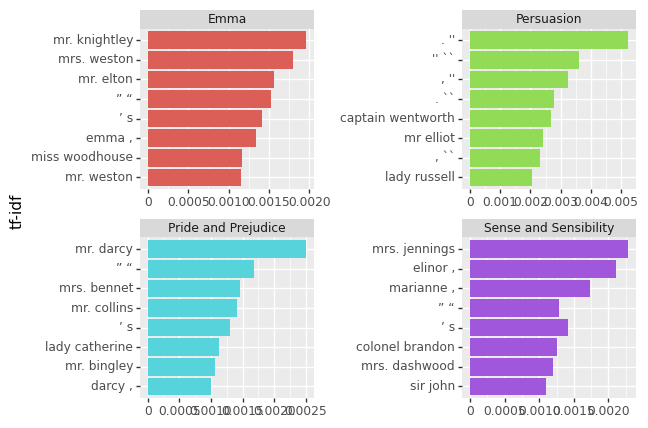

<ggplot: (8745030117105)>

In [14]:
from plotnine import *
from siuba.dply.forcats import fct_lump, fct_reorder
ggplot(ordered_graph_jane_austen) + aes(x=fct_reorder(ordered_graph_jane_austen['bigrams'], x=ordered_graph_jane_austen['tf_idf']), y='tf_idf', fill='book') + coord_flip() + geom_col(show_legend = False) + facet_wrap('~book', ncol = 2, scales = "free") + labs(x = "tf-idf", y = None) + theme(subplots_adjust={'wspace': 0.15}) + theme(subplots_adjust={'wspace': 0.85, 'hspace': 0.3}) + scale_x_discrete()


### N-grams and sentiment analysis

Another idea could be combining sentiment analysis with n-grams.

Let's see how badly afinn's naiveness affected us in our sentiment analysis. We'll try to analyze all of the words that got negated by 'not' and for which afinn gave false sentiment values. This is why we kept the stop words, in order to not lose the 'not'.

In [15]:
# We'll take all the bigrams that start with the word 'not'
from siuba import *
count(filter(jane_austen_df, _.word1 == 'not'), _.word1, _.word2, sort=True)

,word1,word2,n
0,not,be,486
1,not,to,225
2,not,have,218
3,not,know,161
4,not,a,136
...,...,...,...
1035,not,ill,1
1036,not,ill-used,1
1037,not,imagine.,1
1038,not,impute,1


In [16]:
!pip install afinn
from afinn import Afinn
afinn = Afinn()

# Split words into positive and negative
afinn_positive = {k: v for k, v in afinn._dict.items() if v > 0}
afinn_negative = {k: v for k, v in afinn._dict.items() if v < 0}

In [17]:
# A look at what positive bigrams look like
jane_austen_df[jane_austen_df.word2.isin(afinn_positive)]

,book,bigrams,word1,word2
161,Sense and Sensibility,to engage,to,engage
164,Sense and Sensibility,general good,general,good
187,Sense and Sensibility,very advanced,very,advanced
223,Sense and Sensibility,a great,a,great
252,Sense and Sensibility,the legal,the,legal
...,...,...,...,...
97792,Persuasion,friends wish,friends,wish
97794,Persuasion,that tenderness,that,tenderness
97808,Persuasion,her sunshine,her,sunshine
97840,Persuasion,more distinguished,more,distinguished


In [18]:
# A look at what negative bigrams look like
jane_austen_df[jane_austen_df.word2.isin(afinn_negative)]

,book,bigrams,word1,word2
211,Sense and Sensibility,her death,her,death
233,Sense and Sensibility,her loss,her,loss
519,Sense and Sensibility,gentleman died,gentleman,died
536,Sense and Sensibility,much disappointment,much,disappointment
544,Sense and Sensibility,so unjust,so,unjust
...,...,...,...,...
97699,Persuasion,not fail,not,fail
97798,Persuasion,the dread,the,dread
97802,Persuasion,future war,future,war
97822,Persuasion,must pay,must,pay


In [19]:
# Now we’ll make a separate dataframe containing the positive and negative words.
# We’ll filter the bigrams that have ‘not’ as first word from our Jane Austen dataframe. 
# We’ll then (inner) join this filtered dataframe with the afinn one that we created in order to keep only the entries where word2 is a negative or positive word (and keep its sentiment value).
# Now a simple count helps us see how often each positive/negative 2nd word appears when the first word is 'not'.


from siuba import *
afinn_df = pd.DataFrame({'word': afinn._dict.keys(), 'value' : afinn._dict.values()})
not_sentiment_contribution = count(join(filter(jane_austen_df, _.word1 == 'not'), afinn_df, how = "inner", on = {"word2": "word"}), _.word2, _.value, sort=True)
not_sentiment_contribution


,word2,value,n
0,help,2,68
1,like,2,52
2,allow,1,30
3,wish,1,29
4,want,1,26
...,...,...,...
219,fortunate,2,1
220,gain,2,1
221,granted,1,1
222,great,3,1


In [20]:
from siuba import *

# Add a new column with the total sentimental contribution to the books of each word (sentiment value * number of occurrences)
not_sentiment_contribution = not_sentiment_contribution.assign(contribution=not_sentiment_contribution.value*not_sentiment_contribution.n)

# Keep the first 20 strongest contributions in either direction. Use absolute value for this.
first_20_contribs = arrange(not_sentiment_contribution, -abs(_.contribution)).head(20)
first_20_contribs


,word2,value,n,contribution
0,help,2,68,136
1,like,2,52,104
2,allow,1,30,30
3,wish,1,29,29
4,want,1,26,26
8,care,2,13,26
9,fail,-2,13,-26
11,deny,-2,12,-24
16,handsome,3,8,24
18,love,3,8,24


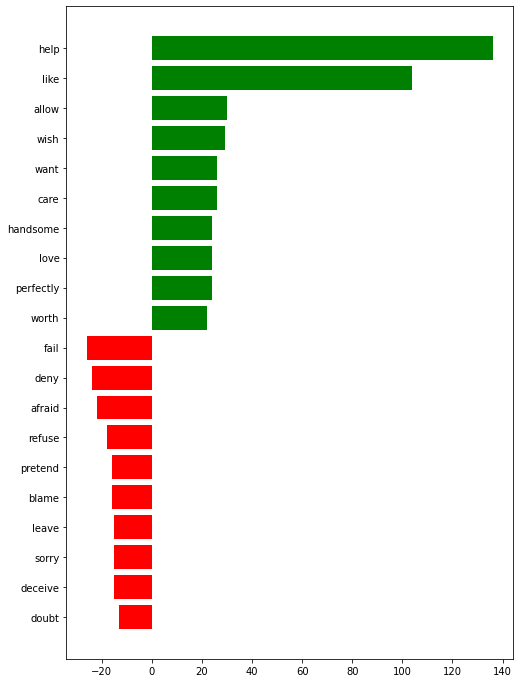

In [21]:
# Can use a simple matplotlib plot for this

import numpy as np
import matplotlib.pyplot as plt

x=first_20_contribs['word2']
y=first_20_contribs['contribution']
mask1 = y < 0
mask2 = y >= 0

plt.figure(figsize=(8, 12))

#plot3: barh with correct order: top-down y axis

plt.barh(x[mask2],y[mask2], color='green')
plt.barh(x[mask1],y[mask1], color='red')

plt.gca().invert_yaxis()


It’s obvious that there is more positive contribution that is false than there is false negative contribution. The bigram "not help" is the one that contributes falsely the most. The fact that the word 'help' is preceded by 'not' means that when afinn calculates the total sentiment of the book, the contribution of this bigram will always be positive, when in fact it should be negative.
We can conclude that the overall sentiment of the book (although probably still a positive one) is less positive than we had initially thought. 


Exercise 4 

Choose four books of your choice (different than the ones from Jane Austen) and create a bigram dataframe for them.

1. Perform a similar analysis to the one where we looked for popular street names in our books. Be creative, anything goes, but don't perform the same exact analysis (don't look for street names). Plotting is not necessary

2. Plot the most important 8 bigrams from each book based on their tf-idf score.

3. Perform a similar analysis to the one where we looked at words that most commonly occur after 'not' and contribute the opposite sentiment than afinn would have us believe. Use a different negation than 'not'. Plot the top 20 false contributions (use absolute value for your sorting).


In [22]:
# Write your code below

# Networks
Now it’s time to plot a network-like graph to show the connections between the words

We’ll first convert our dataframe such that we only have the information required for creating an actual nodes graph. We will have the nodes (the words from word1 and word2) and will know that they have an edge between them (with weight = n, but that is of no particular interest)


In [23]:
from siuba import *
jane_austen_graph_df = jane_austen_test_df.drop(columns=['book'])
j_a_graph_df = count(jane_austen_graph_df, _.bigrams, _.word1, _.word2, sort=True).drop(columns=['bigrams'])



In [24]:
# We’ll then clean the dataframe (remove stopwords)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

remove_words = []

punctuation_signs = ['\'', "''", ';', '"', ',', '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘', '``', "--"]
custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

remove_words.extend(stopwords.words('english'))
remove_words.extend(punctuation_signs)
remove_words.extend(custom_stop_words)

j_a_graph_df
j_a_graph_df_filtered = j_a_graph_df[~j_a_graph_df.word1.isin(remove_words)]
j_a_graph_df_filtered = j_a_graph_df_filtered[~j_a_graph_df_filtered.word2.isin(remove_words)]
j_a_graph_df_filtered_n = j_a_graph_df_filtered.head(35)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import networkx as nx

# Create our Graph object
G = nx.from_pandas_edgelist(df=j_a_graph_df_filtered_n, source='word1', target='word2', edge_attr='n')


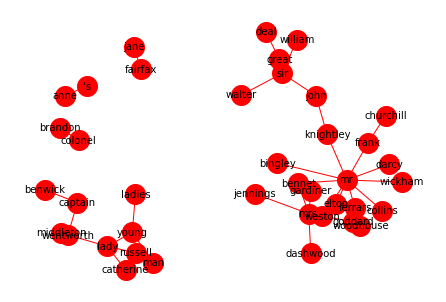

In [26]:
import matplotlib.pyplot as plt

# Time to draw it 
nx.draw(G, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=400, font_size=10, node_color='r', edge_color='r', with_labels=True)

plt.show()
# plt.savefig('plotgraph.png', dpi=300, bbox_inches='tight') # can also save it to file


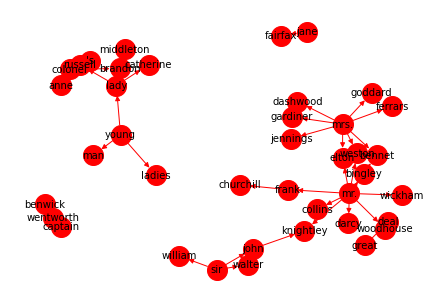

In [27]:
# We could also create a directed graph, thus knowing which of the 2 words comes second in the relationship.

G_directed = nx.from_pandas_edgelist(df=j_a_graph_df_filtered_n, source='word1', target='word2', edge_attr='n', create_using=nx.DiGraph())

nx.draw(G_directed, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=400, font_size=10, node_color='r', edge_color='r', with_labels=True)
plt.savefig('plotgraph_dir.png', dpi=300, bbox_inches='tight')
plt.show()


We can come up with many different graphs. We can make graphs out of the most common bigrams (of a book/set of books), from a chapter of a book, from an entire book, from a collection of books etc.

# Exercise 5

Draw an undirected graph for the dataframe you've come up with for Exercise 4. 

You can play around with the drawing parameters if you'd like to better clusterize the data - for more details you can check https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout



In [28]:
# Write your code below